In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
# check duplicates
train_data.duplicated().sum()

0

In [5]:
train_data.shape

(165034, 14)

In [6]:
train_data['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [7]:
# Calculate the percentage
percentage_values = (train_data['Exited'].value_counts() / len(train_data)) * 100
percentage_values

Exited
0    78.840118
1    21.159882
Name: count, dtype: float64

In [8]:
# Calculate average balance of customers who churned
avg_churned_bal = train_data[train_data['Exited']==1]['Balance'].mean()
avg_churned_bal

71209.97808453366

In [9]:
# Create a new df that drops id, CustomerId, Surname, and Gender cols
churn_df = train_data.drop(['id','CustomerId', 'Surname', 'Gender'], axis=1)

In [10]:
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True)
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True


In [11]:
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=42)

# **Creating Logistic Regression Model**

In [12]:
# Instantiate the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=0)

# Fit the model to training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on test data
lr_pred = logistic_regression_model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming you have y_test and lr_pred
# Replace these with your actual test labels and predicted labels

# Calculate performance metrics
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, lr_pred)

# Create a DataFrame to store the results
results_logistic_regression = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','roc_auc'],
    'Logistic Regression': [accuracy, precision, recall, f1, roc_auc]
})

# Print the DataFrame
print(results_logistic_regression)

      Metric  Logistic Regression
0   Accuracy             0.784847
1  Precision             0.467521
2     Recall             0.121191
3   F1 Score             0.192486
4    roc_auc             0.542074


In [14]:
#save the model
import os
import pickle as pkl

# Get the current working directory
current_directory = os.getcwd()

kaggle_folder = '/kaggle/working'
model_file_path = os.path.join(current_directory, kaggle_folder, 'logistic_regression_model.pkl')

# Save the model to the specified folder using pickle
with open(model_file_path, 'wb') as file:
    pkl.dump(logistic_regression_model, file)

# Creating Decision Tree****

In [15]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree = decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [16]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, dt_pred)

# Create a DataFrame to store the results
results_decision_tree = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','roc_auc'],
    'decision_tree': [accuracy, precision, recall, f1, roc_auc]
})

# Print the DataFrame
print(results_decision_tree)

      Metric  decision_tree
0   Accuracy       0.798202
1  Precision       0.522489
2     Recall       0.537572
3   F1 Score       0.529923
4    roc_auc       0.702860


In [17]:
# Get the current working directory
current_directory = os.getcwd()

kaggle_folder = '/kaggle/working'
model_file_path = os.path.join(current_directory, kaggle_folder, 'decision_tree.pkl')

# Save the model to the specified folder using pickle
with open(model_file_path, 'wb') as file:
    pkl.dump(decision_tree, file)

# # Tuning Decision Tree****

In [18]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [19]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 0)

In [20]:
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

In [21]:
# Assign a set of scoring metrics to capture
# Specify the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [22]:
%%time
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

CPU times: user 3min 14s, sys: 53.7 ms, total: 3min 15s
Wall time: 3min 15s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [23]:
# Examine the best model from GridSearch
clf.best_estimator_
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.6278


In [24]:
clf_opt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=0)

In [25]:
%%time

clf_opt = clf_opt.fit(X_train, y_train)

CPU times: user 502 ms, sys: 978 µs, total: 503 ms
Wall time: 505 ms


In [26]:
# Make predictions on test data
tuned_dt_pred = clf_opt.predict(X_test)

In [27]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, tuned_dt_pred)
precision = precision_score(y_test, tuned_dt_pred)
recall = recall_score(y_test, tuned_dt_pred)
f1 = f1_score(y_test, tuned_dt_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, tuned_dt_pred)

# Create a DataFrame to store the results
results_tuned_decision_tree = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','roc_auc'],
    'tuned_decision_tree': [accuracy, precision, recall, f1, roc_auc]
})

# Print the DataFrame
print(results_tuned_decision_tree)

      Metric  tuned_decision_tree
0   Accuracy             0.861727
1  Precision             0.733302
2     Recall             0.544559
3   F1 Score             0.624992
4    roc_auc             0.745703


In [28]:
import pickle
# Get the current working directory
current_directory = os.getcwd()

kaggle_folder = '/kaggle/working'
model_file_path = os.path.join(current_directory, kaggle_folder, 'clf_opt.pkl')

# Save the model to the specified folder using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(clf_opt, file)

# Creating Random Forest****

In [29]:
# Import `numpy`, `pandas`, `pickle`, and `sklearn`.
# Import the relevant functions from `sklearn.ensemble`, `sklearn.model_selection`, and `sklearn.metrics`.
 
import numpy as np
import pandas as pd

import pickle as pkl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [30]:
# Randomforest model

#Determine set of hyperparameters.

### YOUR CODE HERE ###

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [31]:
# Separate into train, validate, test sets.

### YOUR CODE HERE ###

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [32]:
# Create list of split indices.


split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [33]:
# Instantiate model.


rf = RandomForestClassifier(random_state=0)

In [34]:
# Search over specified parameters.


rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [35]:
%%time

# Fit the model.


rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: user 14.4 s, sys: 298 ms, total: 14.7 s
Wall time: 1min 15s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [36]:
# Obtain optimal parameters.


rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [37]:
# Use optimal parameters on GridSearchCV.

rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.5, random_state = 0)

In [38]:
# Fit the optimal model.

%time

rf_opt=rf_opt.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [39]:
# Predict on test set.

randomforest_pred = rf_opt.predict(X_test)

In [40]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, randomforest_pred)
precision = precision_score(y_test, randomforest_pred)
recall = recall_score(y_test, randomforest_pred)
f1 = f1_score(y_test, randomforest_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, randomforest_pred)

# Create a DataFrame to store the results
results_randomforest_pred = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','roc_auc'],
    'randomforest': [accuracy, precision, recall, f1, roc_auc]
})

# Print the DataFrame
print(results_randomforest_pred)

      Metric  randomforest
0   Accuracy      0.862285
1  Precision      0.745590
2     Recall      0.528508
3   F1 Score      0.618555
4    roc_auc      0.740100


In [41]:
# Get the current working directory
current_directory = os.getcwd()

kaggle_folder = '/kaggle/working'
model_file_path = os.path.join(current_directory, kaggle_folder, 'rf_opt.pkl')

# Save the model to the specified folder using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(rf_opt, file)

# ****Creating XGB

In [42]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

In [43]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [44]:
# Define parameters for tuning as `cv_params`.
"""""
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }
"""""
cv_params =  {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

In [45]:
# Assign a set of scoring metrics to capture
# Specify the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

In [46]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [47]:
%%time
# fit the GridSearch model to training data


xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 43min 41s, sys: 9.8 s, total: 43min 51s
Wall time: 13min 37s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100], 'subsample': [0.7, 0.8]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [48]:
# Apply your model to predict on your test data. Call this output "xgb_pred".


xgb_pred = xgb_cv.predict(X_test)

In [49]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, xgb_pred)

# Create a DataFrame to store the results
results_xgb_pred = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','roc_auc'],
    'xgb': [accuracy, precision, recall, f1, roc_auc]
})

# Print the DataFrame
print(results_xgb_pred)

      Metric       xgb
0   Accuracy  0.862745
1  Precision  0.737259
2     Recall  0.544339
3   F1 Score  0.626279
4    roc_auc  0.746188


In [50]:
# Get the current working directory
current_directory = os.getcwd()

kaggle_folder = '/kaggle/working'
model_file_path = os.path.join(current_directory, kaggle_folder, 'xgb_cv.pkl')

# Save the model to the specified folder using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(xgb_cv, file)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

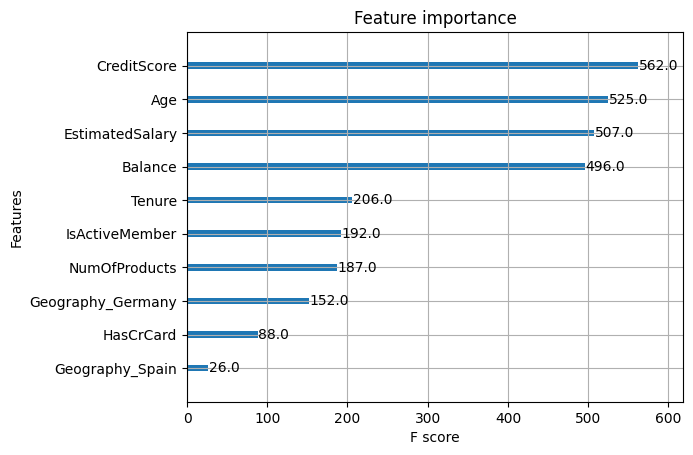

In [51]:
# Plot the relative feature importance of the predictor variables in your model.

plot_importance(xgb_cv.best_estimator_)

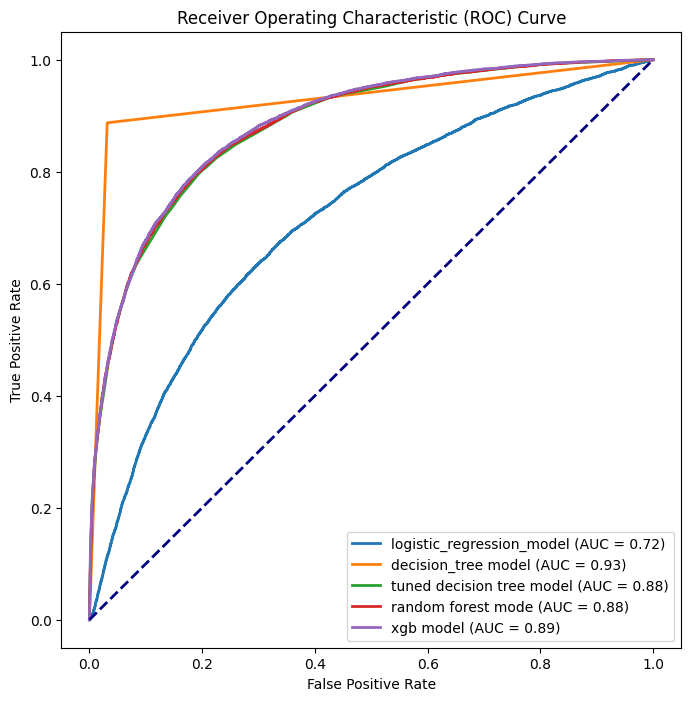

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume you have multiple models, each with its own predicted probabilities
# Example models: model1, model2, model3
models = [logistic_regression_model, decision_tree, clf_opt,rf_opt,xgb_cv]
model_labels = ['logistic_regression_model', 'decision_tree model', 'tuned decision tree model','random forest mode'
                ,'xgb model']

plt.figure(figsize=(8, 8))

# Plot ROC curve for each model
for i, model in enumerate(models):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(model_labels[i], roc_auc))

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Display legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [53]:
# Assuming results_logistic_regression, results_decision_tree, results_tuned_decision_tree, results_randomforest_pred, and results_xgb_pred are your DataFrames

# Merge results_logistic_regression and results_decision_tree
joined_results = pd.merge(results_logistic_regression, results_decision_tree, on='Metric', how='left', suffixes=('_logistic', '_decision_tree'))

# Merge with results_tuned_decision_tree
joined_results = pd.merge(joined_results, results_tuned_decision_tree, on='Metric', how='left', suffixes=('', '_tuned_decision_tree'))

# Merge with results_randomforest_pred
joined_results = pd.merge(joined_results, results_randomforest_pred, on='Metric', how='left', suffixes=('', '_randomforest'))

# Merge with results_xgb_pred
joined_results = pd.merge(joined_results, results_xgb_pred, on='Metric', how='left', suffixes=('', '_xgb'))

display(joined_results)


,Metric,Logistic Regression,decision_tree,tuned_decision_tree,randomforest,xgb
0,Accuracy,0.784847,0.798202,0.861727,0.862285,0.862745
1,Precision,0.467521,0.522489,0.733302,0.745590,0.737259
2,Recall,0.121191,0.537572,0.544559,0.528508,0.544339
3,F1 Score,0.192486,0.529923,0.624992,0.618555,0.626279
4,roc_auc,0.542074,0.702860,0.745703,0.740100,0.746188


# ****Applying the best case model to the test set

Looking at the models "xgboost" model has the better resistence towards overfitting. However, there is very minimum difference in roc_auc, accuracy compared in all the models. So I would go for the "xgboost" model and apply to the test data set.

In [54]:
#Read test data set
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [55]:
# Create a new df that drops id, CustomerId, Surname, and Gender cols
x_final_test = test_data.drop(['id','CustomerId', 'Surname', 'Gender'], axis=1)

In [56]:
# Dummy encode categorical variables
x_final_test = pd.get_dummies(x_final_test, drop_first=True)

In [57]:
y_final_pred = xgb_cv.predict(x_final_test)
print(y_final_pred)

[0 1 0 ... 0 0 0]


In [58]:
y_final_prob = xgb_cv.predict_proba(x_final_test)
print(y_final_prob[:, 1])

[0.02192159 0.76552886 0.01758907 ... 0.02309821 0.11151581 0.15406917]


In [59]:
class_counts = np.bincount(y_final_pred)

# Assuming class '0' and '1' are the classes in your binary classification task
count_class_0 = class_counts[0] if len(class_counts) > 1 else 0
count_class_1 = class_counts[1] if len(class_counts) > 1 else 0

print(f"Count of class '0': {count_class_0}")
print(f"Count of class '1': {count_class_1}")

Count of class '0': 92960
Count of class '1': 17063


In [60]:
final_output = test_data.copy()
final_output['Exited']= y_final_prob[:, 1]
final_output['pred']= y_final_pred

Calculate the avg balance of the customers who are predicted as the 'churn'

In [61]:
avg_churned_bal = final_output[final_output['pred']==1]['Balance'].mean()
avg_churned_bal

70056.18842466157

In [62]:
Submission6=final_output[['id', 'Exited']]
Submission6.to_csv('submission6.csv', index=None)